# Objective:

The objective of this project is to create a machine learning model which will predict whether a patient has diabetes or not based on the diagonostic measurements included in the dataset.

Dataset url : https://www.kaggle.com/uciml/pima-indians-diabetes-database

# Importing the Dependencies

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

# Data Collection and Analysis

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')

In [3]:
# printing the first 5 rows  of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and columns
diabetes_dataset.shape

(768, 9)

In [5]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# data-type of features
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# checking for null values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# checking for duplicate values
diabetes_dataset[diabetes_dataset.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [9]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 => non-diabetic

1 => diabetic

In [10]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Data Visualization

### Outcome countplot

<Axes: xlabel='Outcome', ylabel='count'>

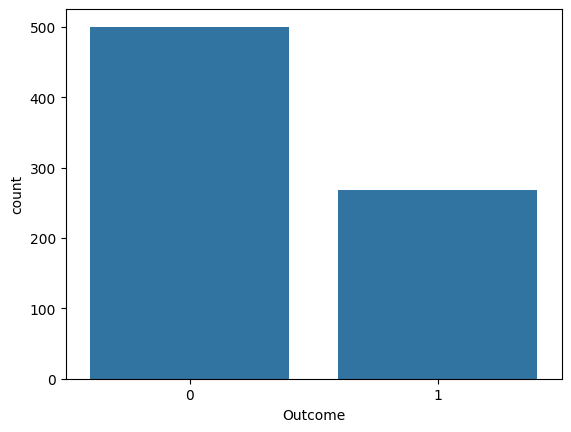

In [11]:
sns.countplot(x='Outcome',data=diabetes_dataset)

### Histogram for each feature

In [12]:
df = diabetes_dataset.drop(columns='Outcome',axis=1)

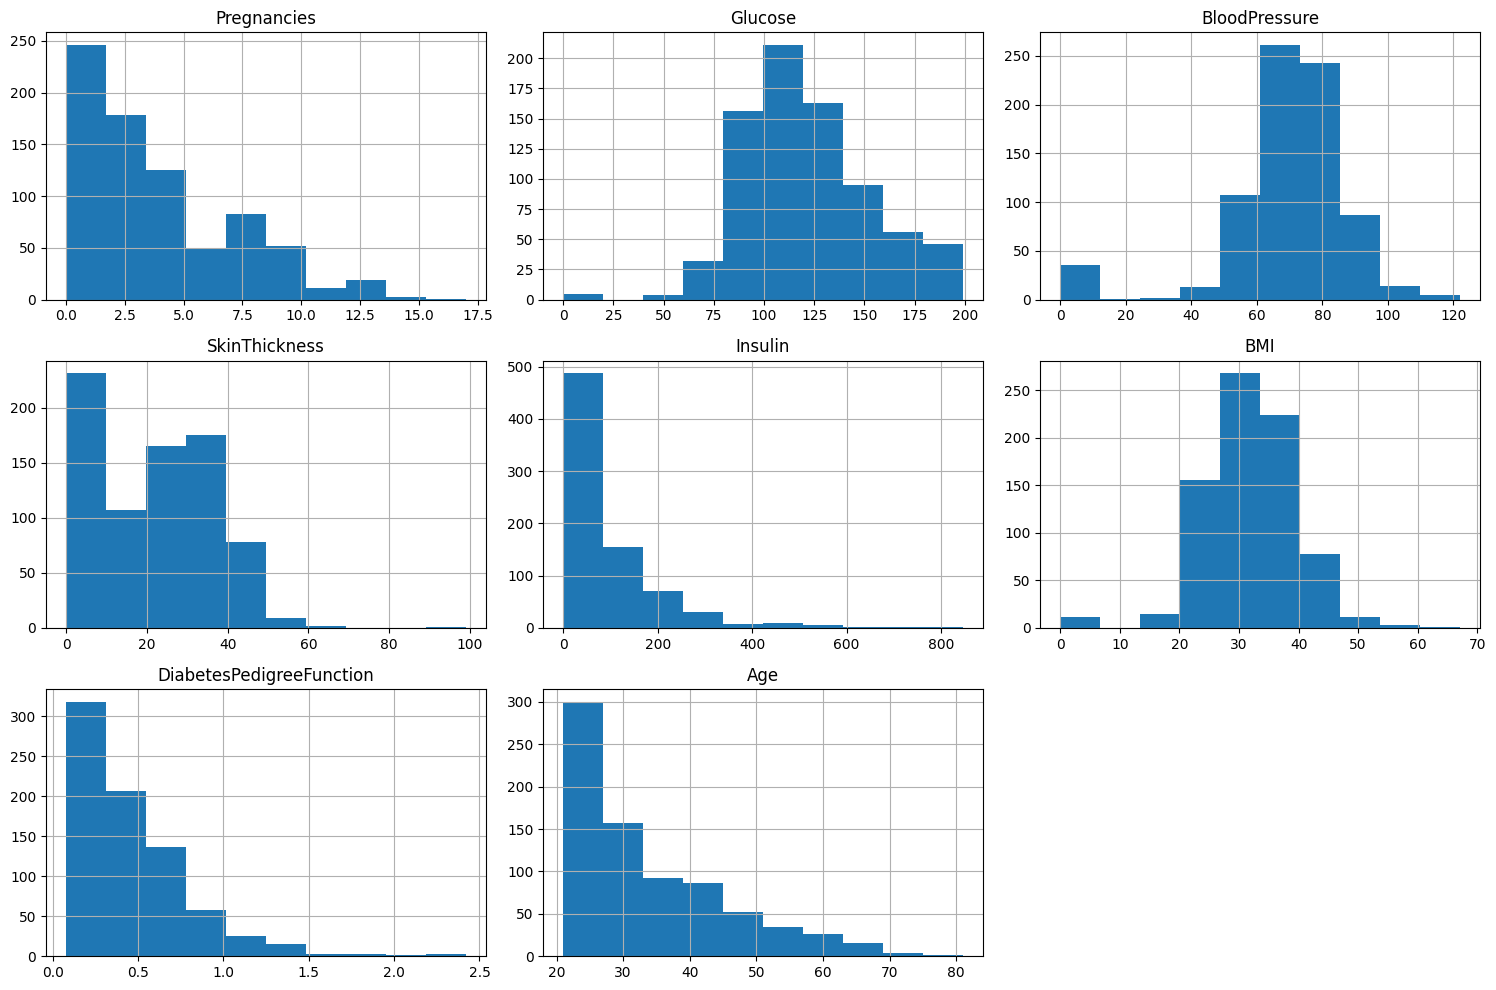

In [13]:
df.hist(bins=10, figsize=(15,10))
plt.tight_layout()
plt.show()

### Scatter Plot

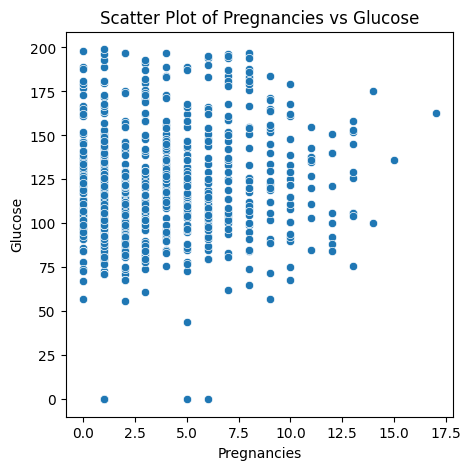

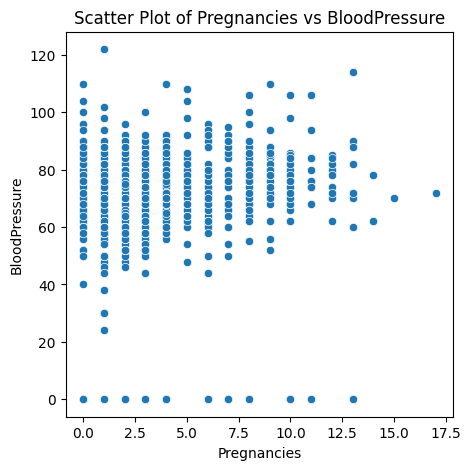

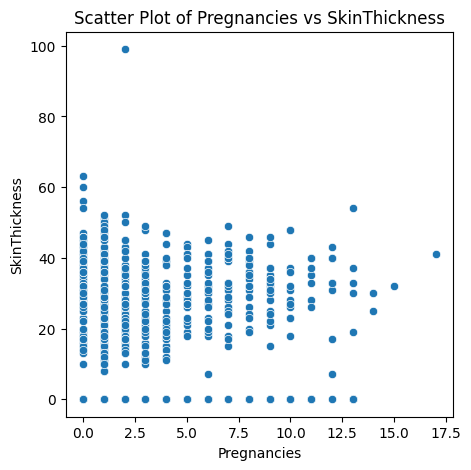

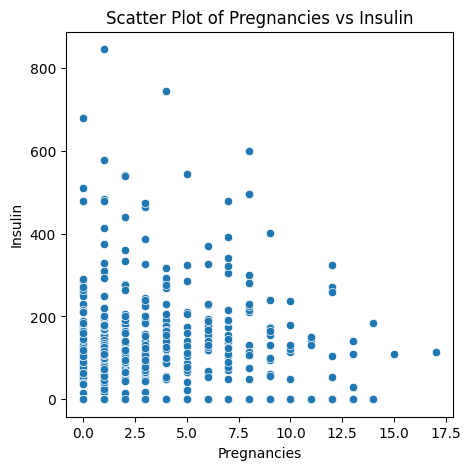

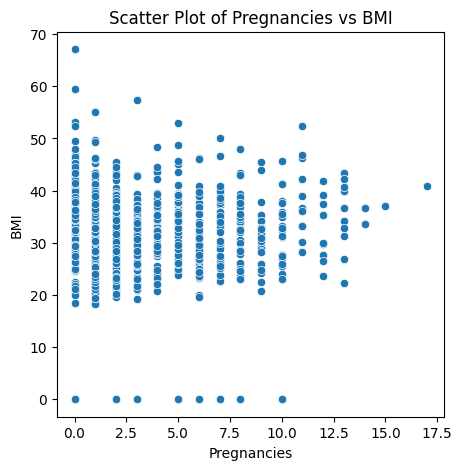

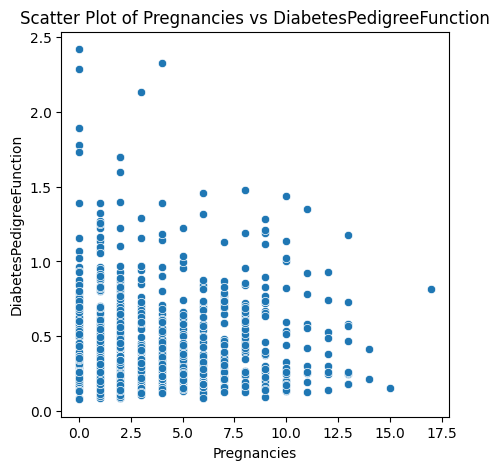

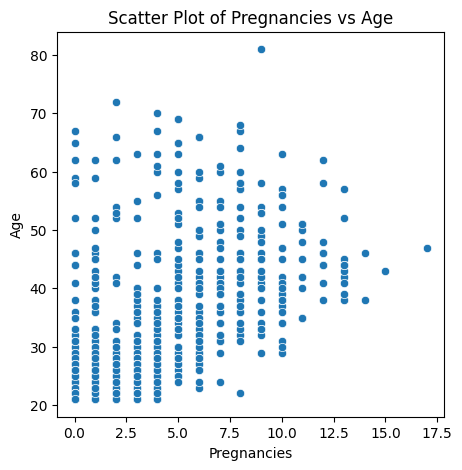

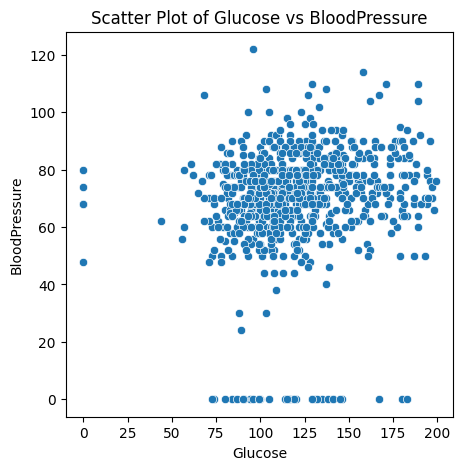

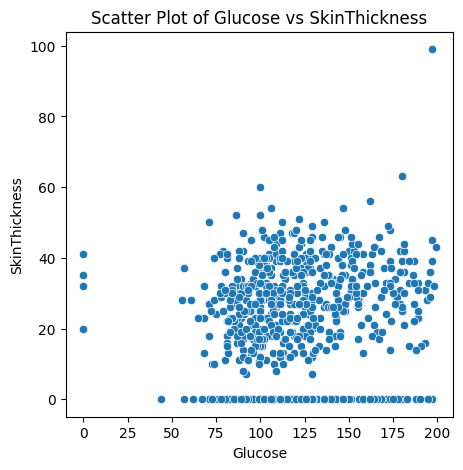

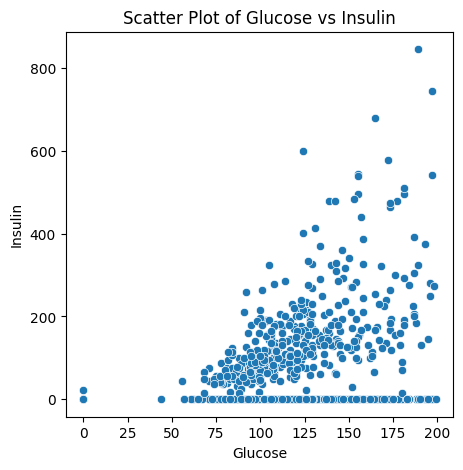

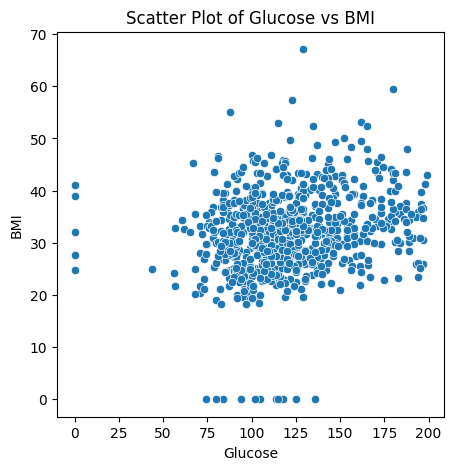

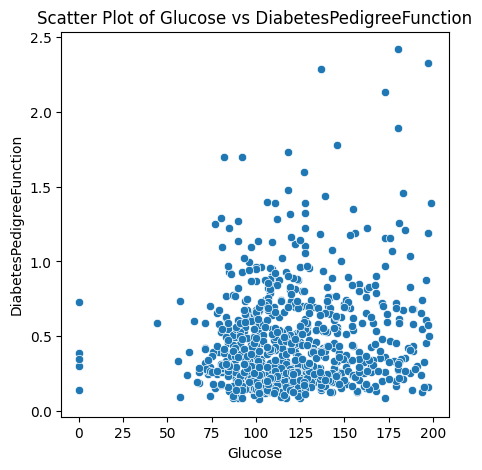

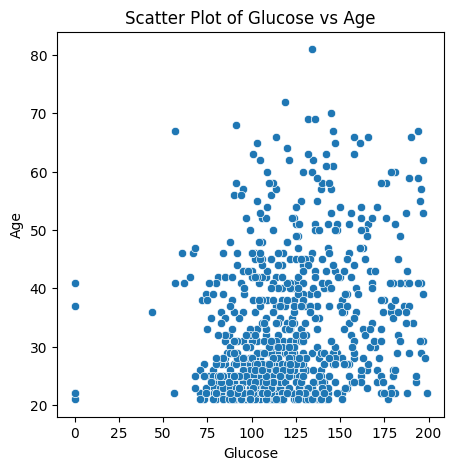

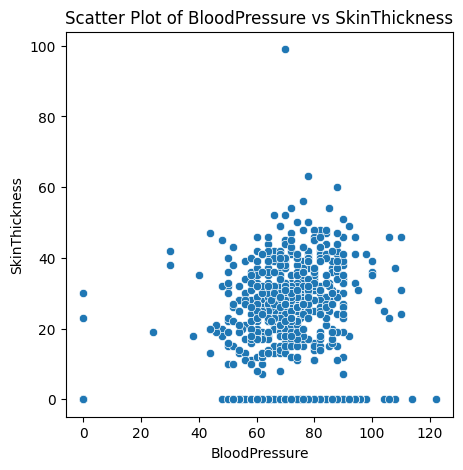

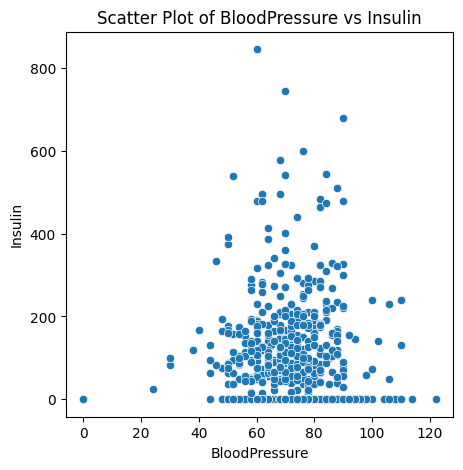

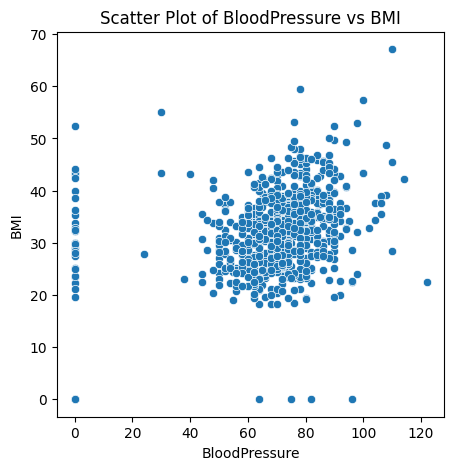

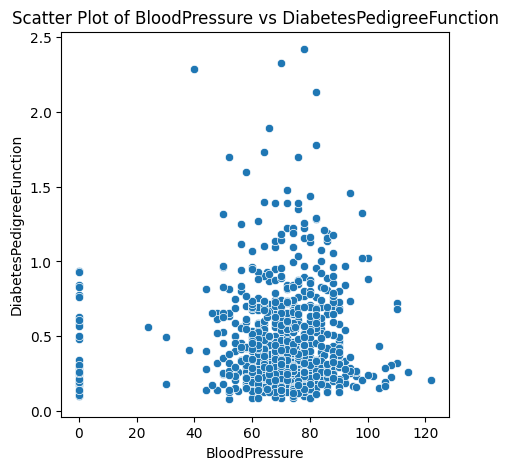

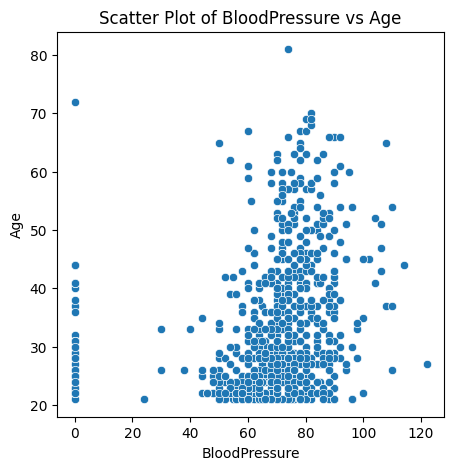

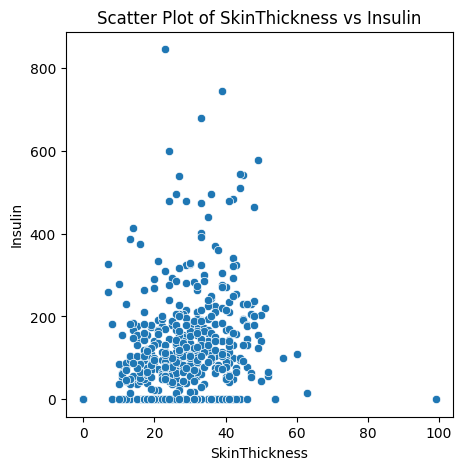

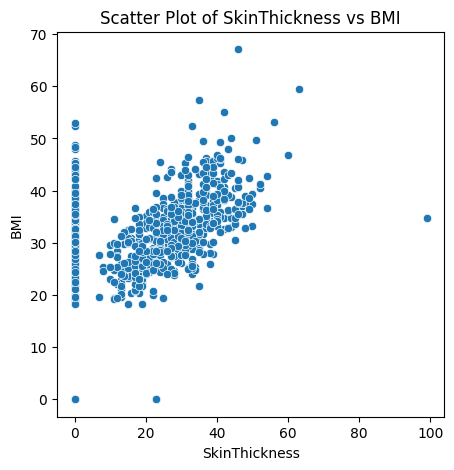

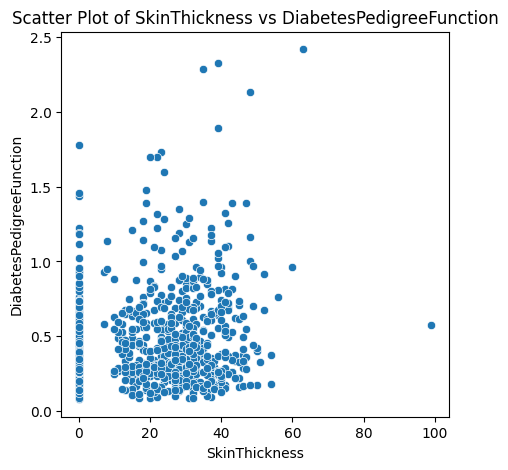

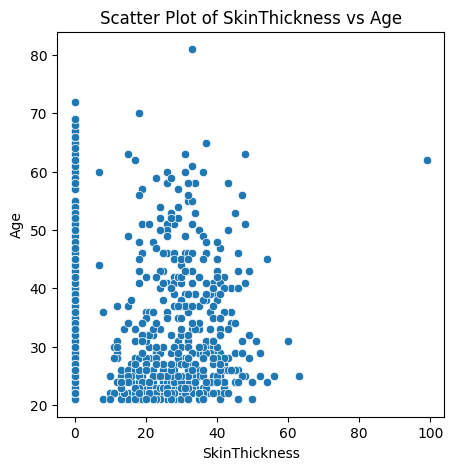

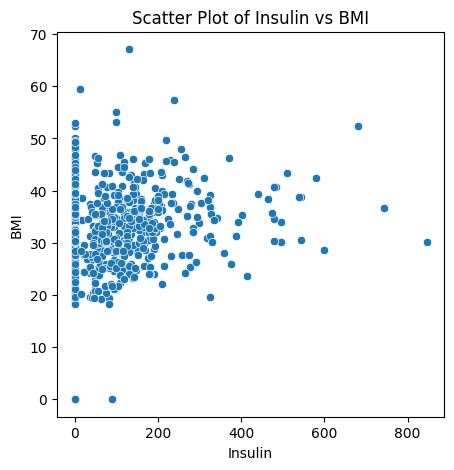

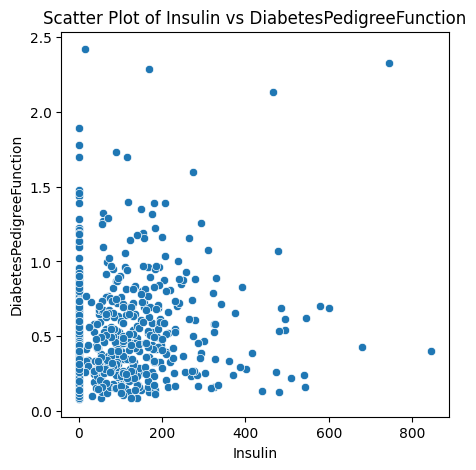

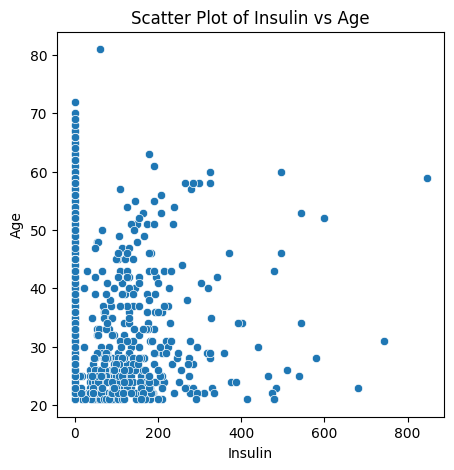

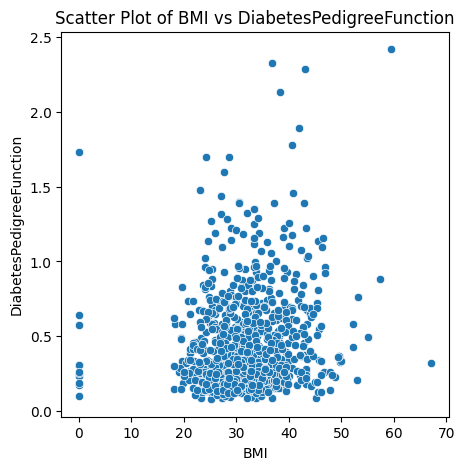

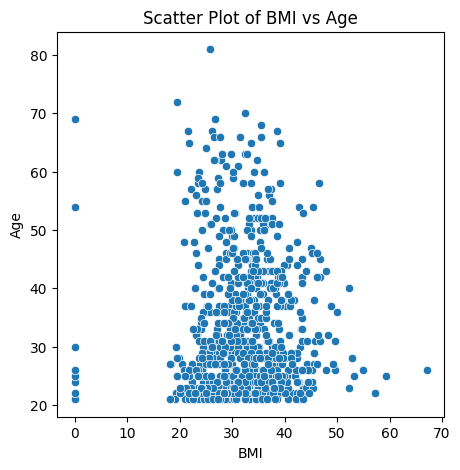

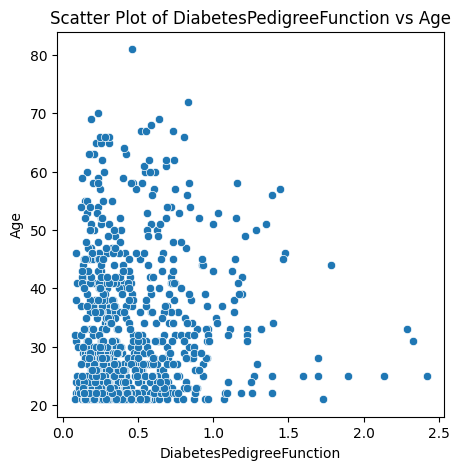

In [14]:
columns = df.columns

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        plt.figure(figsize=(5,5))
        sns.scatterplot(x=df[columns[i]],y=df[columns[j]])
        plt.title(f'Scatter Plot of {columns[i]} vs {columns[j]}')
        plt.xlabel(f'{columns[i]}')
        plt.ylabel(f'{columns[j]}')
        plt.show()
    

### Pair Plot

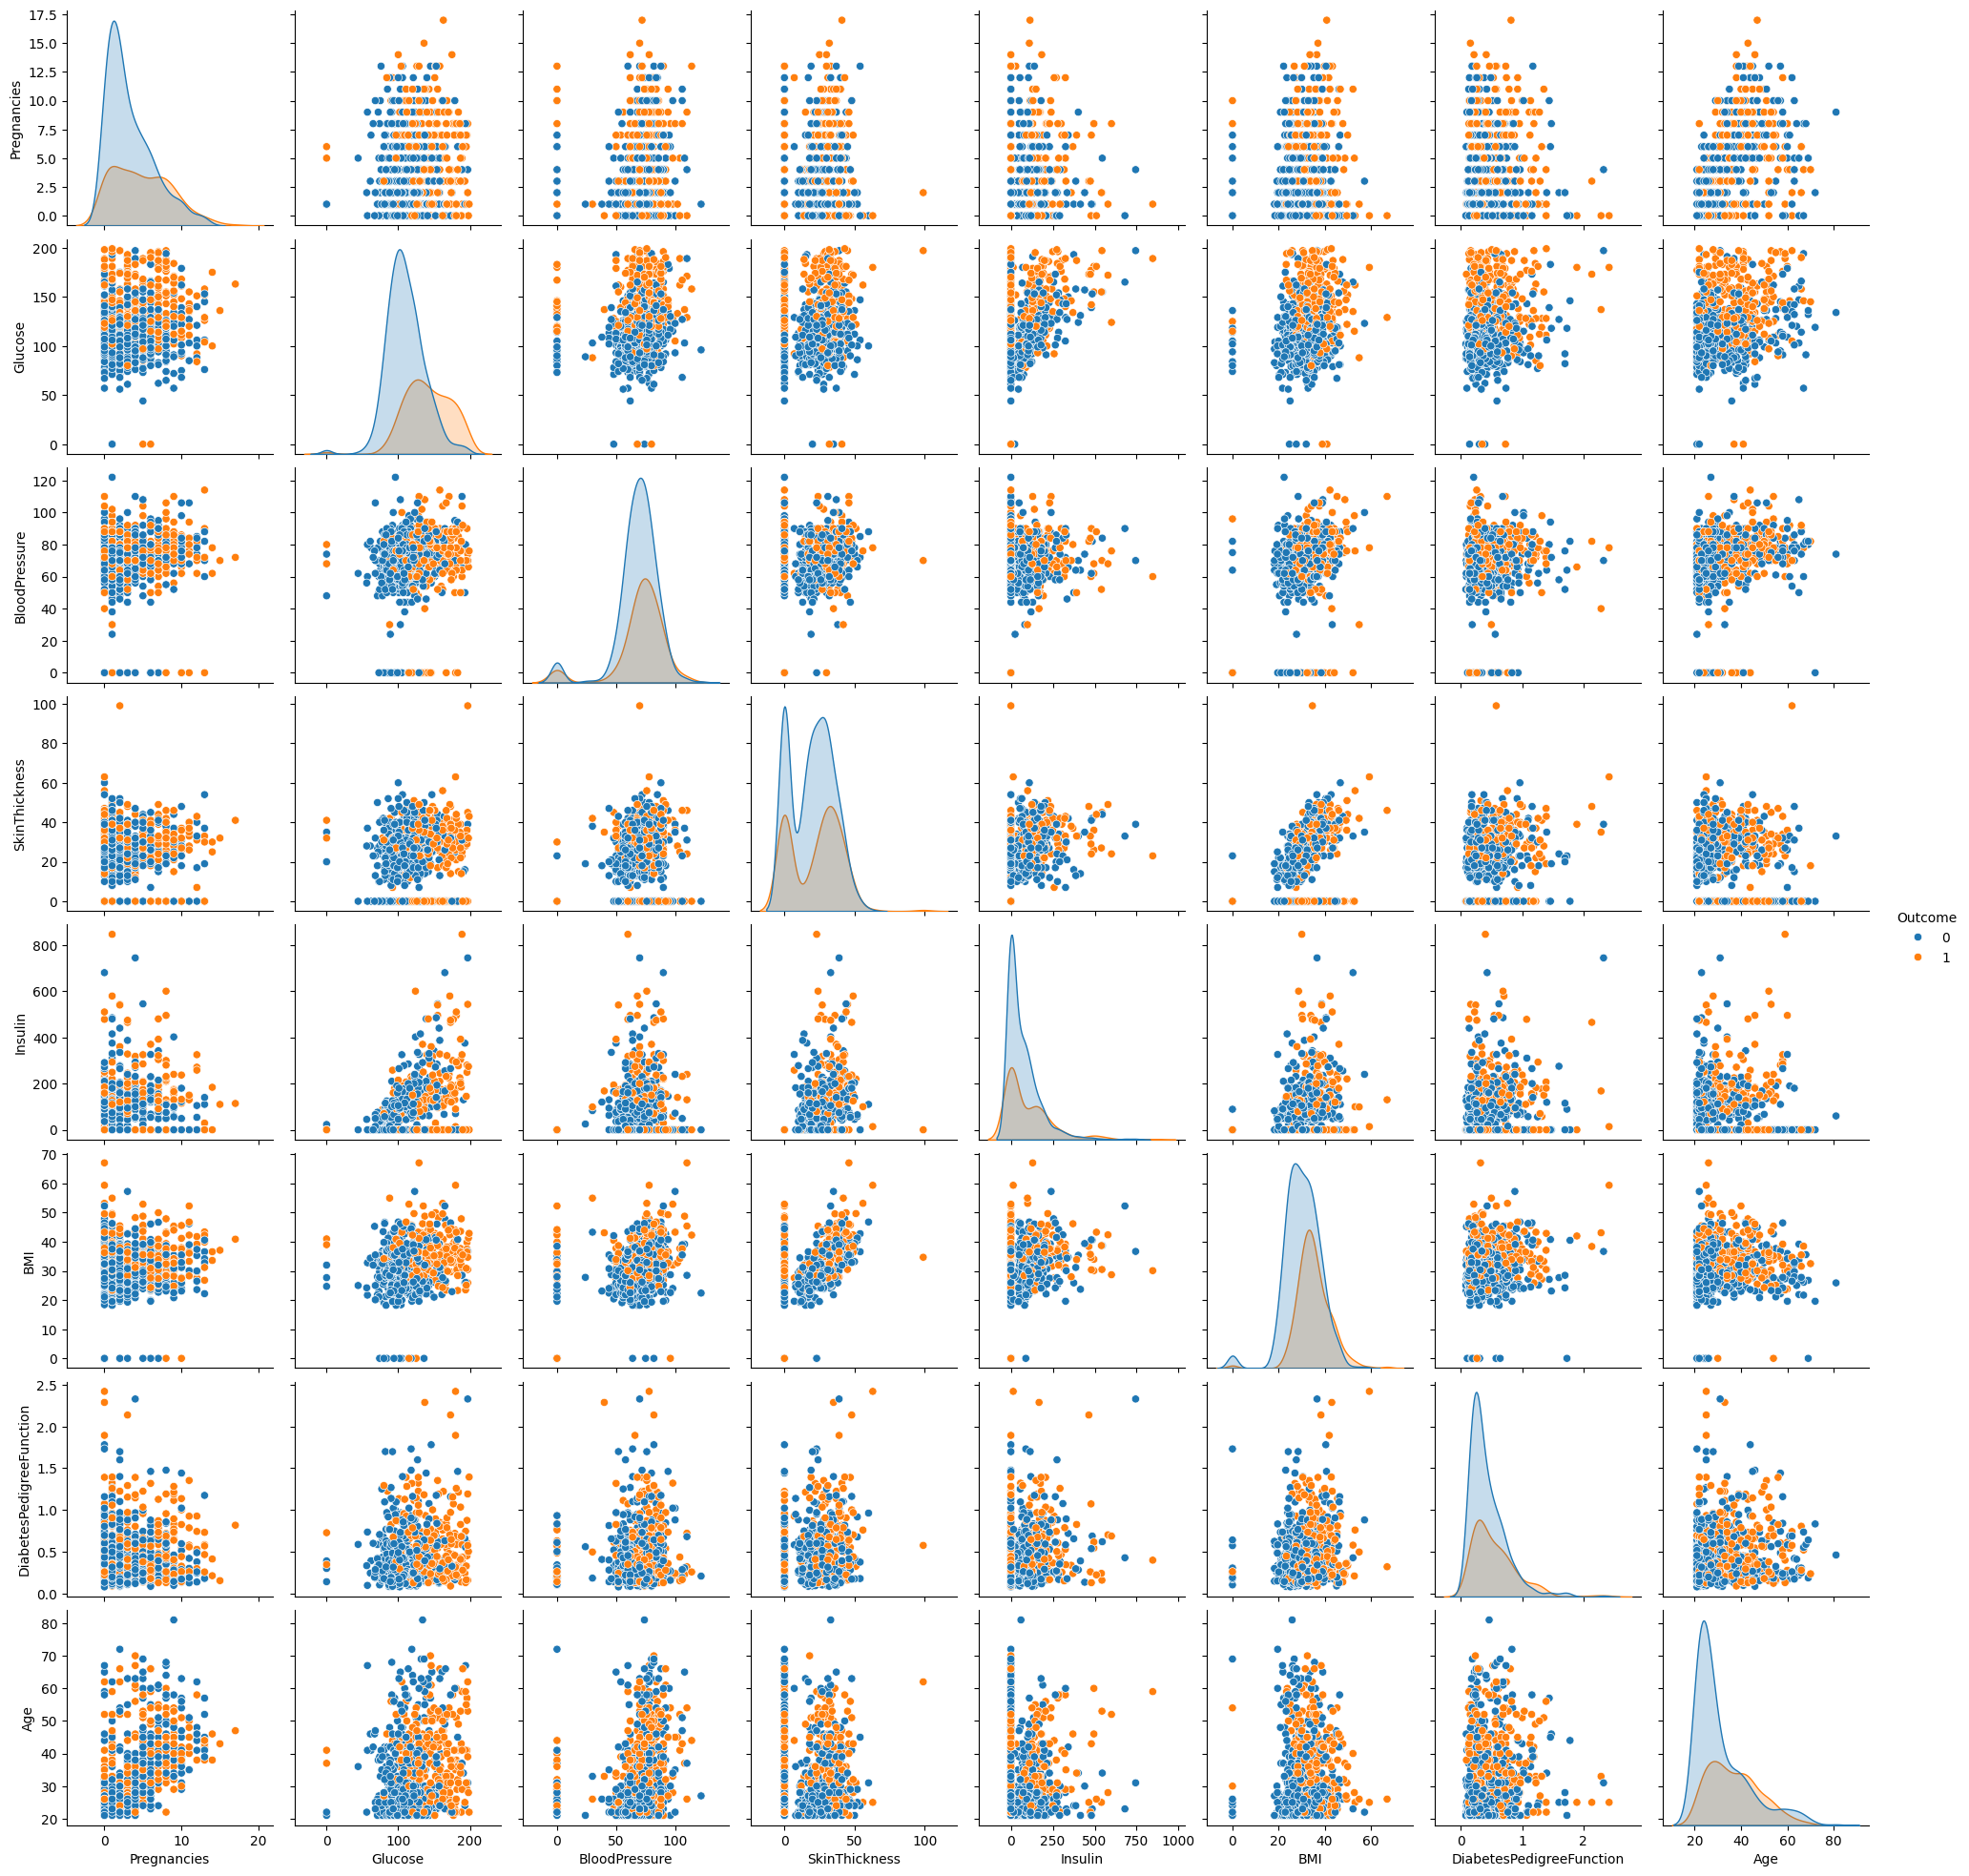

In [15]:
sns.pairplot(data = diabetes_dataset, hue='Outcome')
plt.show()

### Heatmap

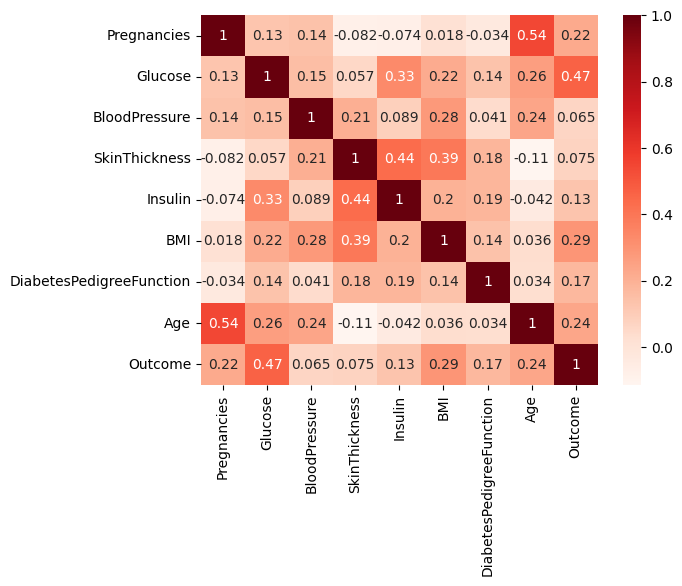

In [16]:
sns.heatmap(diabetes_dataset.corr(),cmap="Reds",annot=True)
plt.show()

# Data Preprocessing

In [17]:
dataset_copy = diabetes_dataset.copy(deep=False)

In [18]:
dataset_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
# Since there are zero values in the dataset for features like Glucose, BP, Skin-Thickness, 
# Insulin, BMI which shows these are missing values.
# Replacing zero values with NaN


In [44]:
dataset_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = dataset_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

In [45]:
# check for the NaN values
dataset_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [46]:
# Replacing NaN with mean values
dataset_copy["Glucose"].fillna(dataset_copy["Glucose"].mean(),inplace=True)
dataset_copy["BloodPressure"].fillna(dataset_copy["BloodPressure"].mean(),inplace=True)
dataset_copy["SkinThickness"].fillna(dataset_copy["SkinThickness"].mean(),inplace=True)
dataset_copy["Insulin"].fillna(dataset_copy["Insulin"].mean(),inplace=True)
dataset_copy["BMI"].fillna(dataset_copy["BMI"].mean(),inplace=True)

In [47]:
dataset_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
# getting the statistical summary
dataset_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


# Feature Selection

In [60]:
# features - (Glucose, Insulin, BMI, Age)
X = dataset_copy.iloc[:,[1,4,5,7]]
Y = dataset_copy.iloc[:,8]

In [61]:
print(X)

     Glucose     Insulin   BMI  Age
0      148.0  155.548223  33.6   50
1       85.0  155.548223  26.6   31
2      183.0  155.548223  23.3   32
3       89.0   94.000000  28.1   21
4      137.0  168.000000  43.1   33
..       ...         ...   ...  ...
763    101.0  180.000000  32.9   63
764    122.0  155.548223  36.8   27
765    121.0  112.000000  26.2   30
766    126.0  155.548223  30.1   47
767     93.0  155.548223  30.4   23

[768 rows x 4 columns]


In [62]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Train Test Split

In [66]:
# Splitting data in train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [67]:
# Checking the dimensions
print(X.shape,X_train.shape,X_test.shape)

(768, 4) (614, 4) (154, 4)


In [65]:
print(Y.shape,Y_train.shape,Y_test.shape)

(768,) (614,) (154,)


# Data Standardization

In [68]:
# standardizing data after test train split prevents data leakage
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Data Modelling

### SVM

In [73]:
# Support Vector Classifier
svc = SVC(kernel='linear')
# training the svm classifier
svc.fit(X_train,Y_train)

SVC(kernel='linear')

### Naive Bayes

In [75]:
# Naive Bayes Algorithm
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

### Logistic Regression

In [76]:
# Logistic Regression Algorithm
logReg = LogisticRegression()
logReg.fit(X_train,Y_train)

LogisticRegression()

### KNN

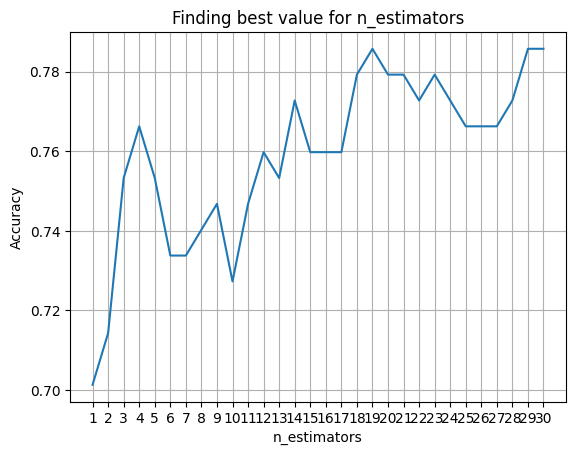

Highest value:  0.7857142857142857


In [81]:
# finding best value for n_estimators

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc._append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [82]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=19)

### Decision Tree

In [85]:
decTree = DecisionTreeClassifier(criterion = 'entropy')
decTree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [84]:
### Random Forest
randForest = RandomForestClassifier(n_estimators = 11, criterion = 'entropy')
randForest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11)

# Model Evaluation

In [86]:
# making predictions on test dataset
Y_pred_logReg = logReg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_decTree = decTree.predict(X_test)
Y_pred_randForest = randForest.predict(X_test)

In [89]:
# finding accuracy score for each predictions
accuracy_logReg = accuracy_score(Y_test, Y_pred_logReg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_decTree = accuracy_score(Y_test, Y_pred_decTree)
accuracy_randForest = accuracy_score(Y_test, Y_pred_randForest)

In [90]:
# printing accuracy score
print("Logistic Regression: " + str(accuracy_logReg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_decTree * 100))
print("Random Forest: " + str(accuracy_randForest * 100))

Logistic Regression: 75.32467532467533
K Nearest neighbors: 78.57142857142857
Support Vector Classifier: 75.32467532467533
Naive Bayes: 75.97402597402598
Decision tree: 66.23376623376623
Random Forest: 74.02597402597402


In [91]:
# Hence KNN model has the highest accuracy score of 78.57%

In [94]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred_knn)
print(conf_mat)

[[89 11]
 [22 32]]


<Axes: >

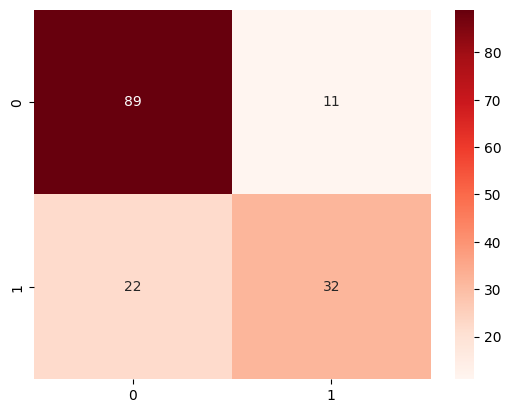

In [97]:
# plot the Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(conf_mat), cmap='Reds', annot=True)

In [99]:
# Classification Report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       100
           1       0.74      0.59      0.66        54

    accuracy                           0.79       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

